# MNist data read


In [15]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)




def my_mnist_bach(size, number = 0) :
    m = 500
    data = []
    for i in range(1000) :
        image, label = mnist.train.next_batch(m)       
        for j in range(len(label)) : 
            if np.argmax(label[j])==number :
                data.append(image[j])              
            if len(data) == size :
                break
        if len(data) == size :
            break
    return data

def mnist_4by4_save(samples,path):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)    
    gs.update(wspace=0.05, hspace=0.05) #이미지 사이간격 조절
  
    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')    
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
   
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r',clim=(0.0,1.0))
    plt.colorbar()
    plt.savefig(path, bbox_inches='tight')
    plt.close(fig)
   
    return None
#my_lib.mnist_4by4_save(np.reshape(r,(-1,784)),file_name + '/result_{}.png'.format(str(i).zfill(3)))



Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
data = my_mnist_bach(100, number = 8) 

In [ ]:
plt.imshow(data[3].reshape(28, 28), cmap='Greys_r')

# csv data read

In [ ]:
import csv
 
f = open('2018-09-07_08h38m49s.f_oes.csv', 'r')
rdr = csv.reader(f)
for line in rdr:
    print(line)
f.close()  

In [ ]:
im, _ = mnist.train.next_batch(1)       

In [ ]:
plt.imshow(im.reshape(28, 28), cmap='Greys_r')
plt.colorbar()

# anoGANs data generate


In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True,reshape=[])


with tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))) as sess :
    sess.run(tf.global_variables_initializer())
    
    train_set = tf.image.resize_images(mnist.train.images,[64,64]).eval()                                                                                                           
    train_label = mnist.train.labels
    train_set = (train_set -0.5)/0.5
    
    test_set = tf.image.resize_images(mnist.test.images,[64,64]).eval()                                                                                                           
    test_label = mnist.test.labels
    test_set = (test_set -0.5)/0.5
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
train_size = 55000
test_size = 10000

train_normal_data = []
train_anomalous_data = []
test_normal_data = []
test_anomalous_data = []

for i in range(train_size) :
    
    if  np.argmax(train_label[i]) < 5 :
        train_normal_data.append(train_set[i])
    else : 
        train_anomalous_data.append(train_set[i])

train_normal_data = np.array(train_normal_data)        
train_anomalous_data = np.array(train_anomalous_data)        
                             
for i in range(test_size) :
    
    if  np.argmax(test_label[i]) < 5 :
        test_normal_data.append(test_set[i])
    else : 
        test_anomalous_data.append(test_set[i])        
        
test_normal_data = np.array(test_normal_data)        
test_anomalous_data = np.array(test_anomalous_data)                
    



In [6]:
import pickle
import gzip

with gzip.open('test_normal_data.pickle.gzip','wb') as f :
    pickle.dump(test_normal_data,f)

with gzip.open('test_anomalous_data.pickle.gzip','wb') as f :
    pickle.dump(test_anomalous_data,f)

with gzip.open('train_normal_data.pickle.gzip','wb') as f :
    pickle.dump(train_normal_data,f)

with gzip.open('train_anomalous_data.pickle.gzip','wb') as f :
    pickle.dump(train_anomalous_data,f)



In [2]:
import pickle
import gzip

dir_file = 'anoGANs_MNIST_data/'
with gzip.open(dir_file  + 'test_normal_data.pickle.gzip','rb') as f :
    test_normal_data = pickle.load(f)

with gzip.open(dir_file  + 'test_anomalous_data.pickle.gzip','rb') as f :
    test_anomalous_data = pickle.load(f)

with gzip.open(dir_file  + 'train_normal_data.pickle.gzip','rb') as f :
    train_normal_data = pickle.load(f)

with gzip.open(dir_file  + 'train_anomalous_data.pickle.gzip','rb') as f :
    train_anomalous_data = pickle.load(f)

In [25]:
import numpy as np

def idx_shuffle(x) : 
    l = x.shape[0]
    idx = np.arange(l)
    np.random.shuffle(idx)
    shuffled_x = np.empty(x.shape)

    for i in range(l):
        shuffled_x[idx[i]] = x[i]
    
    return shuffled_x
    
a = np.arange(7)
b = idx_shuffle(train_anomalous_data) 

array([ 1.,  4.,  3.,  6.,  0.,  5.,  2.])

In [2]:
train_normal_data[5].shape

(64, 64, 1)

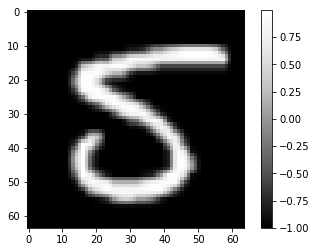

In [26]:
num = 5
plt.imshow( b[num].reshape(64,64), cmap='Greys_r')
plt.colorbar()

In [ ]:
train_normal_data[1]